# Seaborn Tutorial

10/23/2017
Fan

### 1. Importing Libraries and dataset

In [1]:
#load library
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#import dataset
##inde_col = 0 means we will treat the first column as the ID column
df = pd.read_csv('/Users/gongfan/IPython/Pokemon.csv', index_col = 0, encoding='iso-8859-1')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


### 2. Seaborn's Plotting Functions

One of the strengths for seaborn is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the `lmplot()` function

There are two ways to do:
* Pass the DataFrame to the `data=` argument, while passing colum names to the axes argument, `x=` and `y=`.
* Directly pass in Series of data to the axes arguments.

Let's compare the Attact and Defens stats for our Pokemon

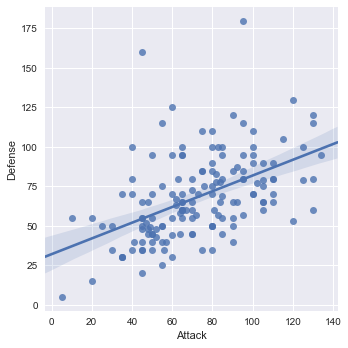

In [4]:
sns.lmplot(x='Attack', y='Defense', data = df)
plt.show()

Seaborn doesn't have a dedicated scatter plot function. But we can change the argument in `lmplot()`:
* We can set `fit_reg = False` to remove the regression line.
* We use `hue = 'Stage'` to color our points by the Pokemon's evolution stage. The **hue** argument is very useful because it allows you to express a third dimension of information using color.

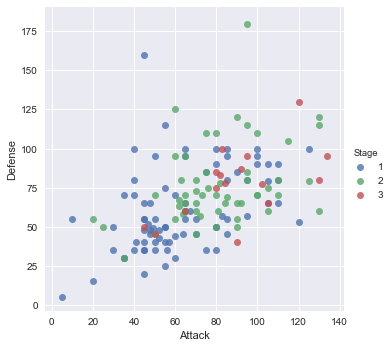

In [5]:
sns.lmplot(x = 'Attack', y = 'Defense', data=df,
           fit_reg = False,
           hue = 'Stage') 

### 3. Customizing with Matplotlib

Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most the way there, but you will sometimes need to bring in Matplotlib.

Setting axes limits is one of those times:

1. Invoke your Seaborn plotting function as normal.
2. Then, invoke Matplotlib's customization functions. In this case, we will use its `ylim` and `xlim` function.

(0, 190.74184304559267)

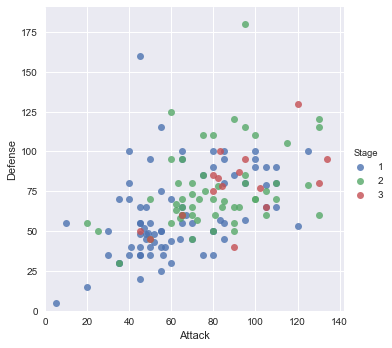

In [6]:
sns.lmplot(x = 'Attack', y = 'Defense', data=df,
           fit_reg = False,
           hue = 'Stage') 
plt.xlim(0, None)
plt.ylim(0, None)

### 4. The Role of Pandas

Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted. 

For example, let's say we wanted to make a box plot:

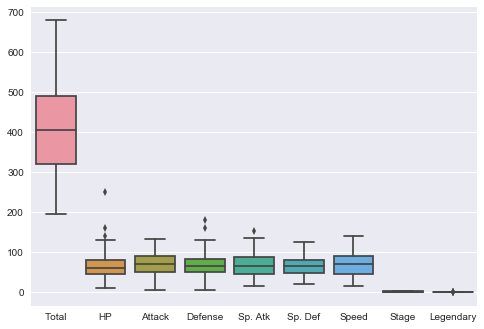

In [7]:
sns.boxplot(data = df)

There are some columns we'd probably like to remove:
* We can remove the Total since we have individual stats.
* We can remove the Stage and Legendary columns because they aren't combat stats.

It's simpler to pre-format our dataframe

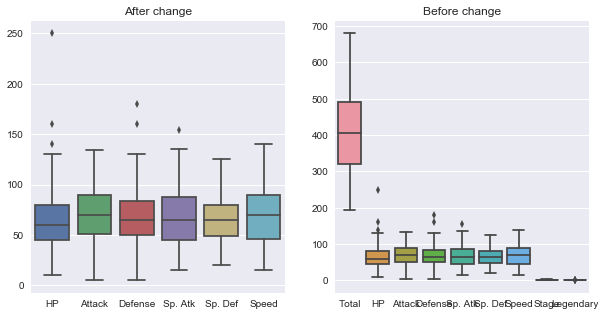

In [8]:
stat_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)

#Mixture of Matplotlib and Seaborn
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
sns.boxplot(data = stat_df, ax = ax[0])
ax[0].set_title('After change')
sns.boxplot(data = df, ax = ax[1])
ax[1].set_title('Before change')


### 5. Seaborn Themes

Another advantage of seaborn is that it comes with decent style themes right out of the box. The default theme id called 'darkgrid'.

Next we will change the theme to 'whitegrid' while making a violin plot.

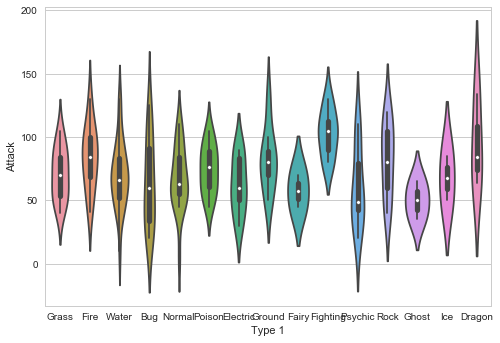

In [9]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y ='Attack', data = df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

### 6. Overlaying Plots

It's pretty straightforward to overlay plots using seaborn. And it works the same way as with Matplotlib.
1. We will make our figure larger using Matplotlib.
2. We will then plot the violin plots with `inner = None` to remove the bars inside the violins.
3. Plot the swarm plot.
4. Set a title using Matplotlib

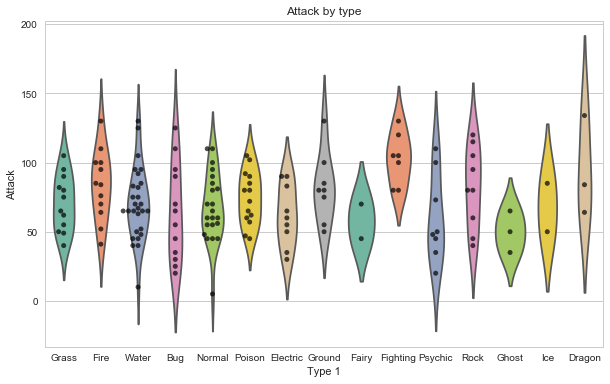

In [10]:
# Set figure size
plt.figure(figsize = (10,6))

# Create plot
sns.violinplot(x='Type 1', y ='Attack', data = df, inner = None,
              palette = 'Set2')
sns.swarmplot(x='Type 1', y ='Attack', data = df, color = 'k', 
              alpha = 0.7 ) #slightly transparent

# Set title
plt.title('Attack by type')

### 7. Putting it all together

Since all of our stats are in seperate columns. Instead, we want to 'melt' them into one column.

To do so, we will use Pandas' `melt()` function. It takes 3 arguments:
* The Dataframe to melt
* ID variables to keep 
* A name for the new, melted variables

We could see that is exactly what we will do if we want to use ggplot to draw some complicated plots.


In [11]:
# Melt DataFrame
melted_df = pd.melt(stat_df, id_vars = ['Name', 'Type 1', 'Type 2'], # Variables to keep
                    var_name = 'Stat') # name of melted variables
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...

In [12]:
print(stat_df.shape)
print(melted_df.shape) # melted_df has 6 times the number of rows as stats_df.

(151, 9)
(906, 5)


Finally let's Make a few final tweaks for a more readable chart:
1. Enlarge the plot.
2. Separate points by hue using the argument split=True .
3. Use our custom Pokemon color palette.
4. Adjust the y-axis limits to end at 0.
5. Place the legend to the right.

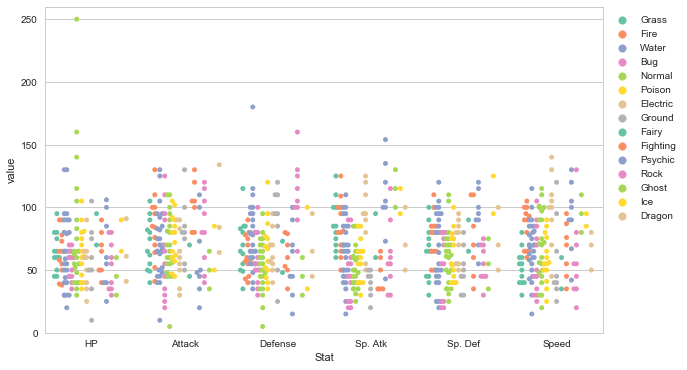

In [13]:
plt.figure(figsize = (10,6))

sns.swarmplot(x = 'Stat',
              y = 'value',
              data = melted_df,
              hue = 'Type 1',
              palette = 'Set2',
              split = True)

plt.ylim(0,260)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

### 8. Other Popular Plots
### Heatmap

Heatmaps help you visualize matrix-like data

In [14]:
corr = stat_df.corr()
corr.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656


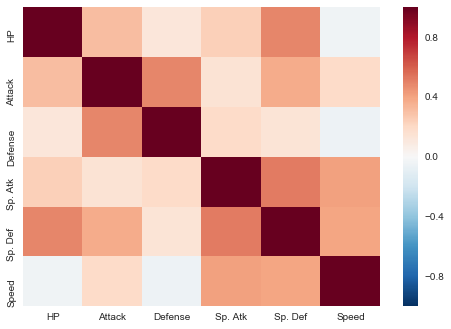

In [15]:
sns.heatmap(corr)

### Histogram
Histograms allow you to plot the distribution of numeric variables.

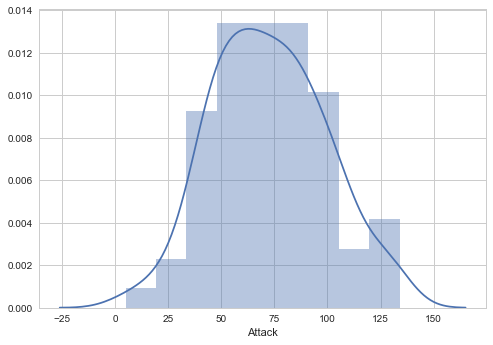

In [17]:
attack = df['Attack']
sns.distplot(attack)

### Bar Plot
Bar plot help to visualize the distribution of categorical data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

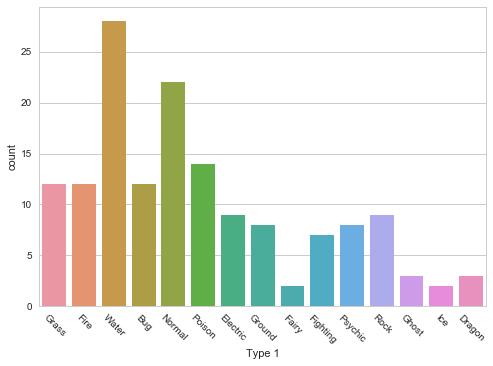

In [19]:
sns.countplot(x = 'Type 1', data = df)

#rotate x-labels
plt.xticks(rotation = -45)

### Factor Plot

Factor plots make it easy to seperate plots by categorical classes.


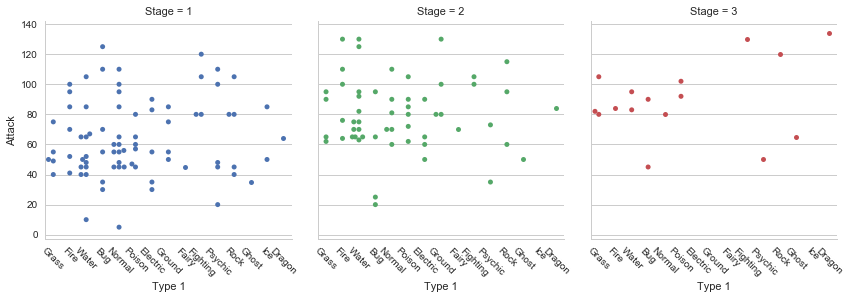

In [20]:
g = sns.factorplot(x = 'Type 1',
                   y = 'Attack',
                   data = df,
                   hue = 'Stage', # color by stage
                   col = 'Stage', # seperate by stage
                   kind = 'swarm')

g.set_xticklabels(rotation = -45)

# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### Density Plot
Density plot display the distribution between two variables.


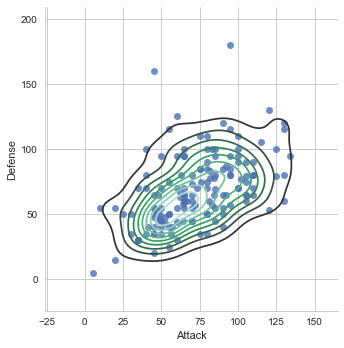

In [30]:
sns.lmplot('Attack', 'Defense', data = df, fit_reg = False)
sns.kdeplot(df['Attack'], df['Defense'])

### Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information from scatter plots and histgrams to give you detailed information for bi-variate distributions.


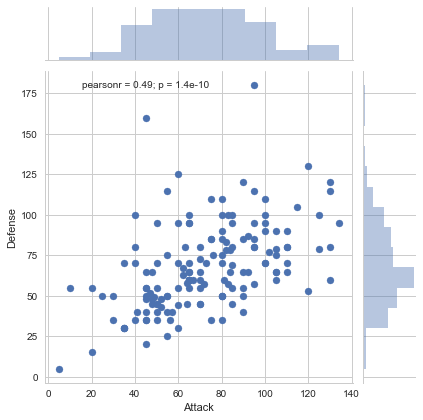

In [31]:
sns.jointplot(x='Attack', y='Defense', data=df)

### Notice for subplots:
The plotting functions in seaborn are broadly divided into two classes

* "Axes-level" functions, including regplot, boxplot, kdeplot, and many others
* "Figure-level" functions, including lmplot, factorplot, jointplot and one or two others

The first group is identified by taking an explicit ax argument and returning an Axes object. As this suggests, you can use them in an "object oriented" style by passing your Axes to them:

```{python}
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(x, y, ax=ax1)
sns.kdeplot(x, ax=ax2)
```

Axes-level functions will only draw onto an Axes and won't otherwise mess with the figure, so they can coexist perfectly happily in an object-oriented matplotlib script.

The second group of functions (Figure-level) are distinguished by the fact that the resulting plot can potentially include several Axes which are always organized in a "meaningful" way. That means that the functions need to have total control over the figure, so it isn't possible to plot, say, an lmplot onto one that already exists. Calling the function always initializes a figure and sets it up for the specific plot it's drawing.

However, once you've called lmplot, it will return an object of the type FacetGrid. This object has some methods for operating on the resulting plot that know a bit about the structure of the plot. It also exposes the underlying figure and array of axes at the FacetGrid.fig and FacetGrid.axes arguments. The jointplot function is very similar, but it uses a JointGrid object. So you can still use these functions in an object-oriented context, but all of your customization has to come after you've called the function.